In [13]:
import librosa
import IPython.display
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the example track
y, sr = librosa.load('wav/sweep.wav')

In [7]:
# load music
#y_m, sr_m = librosa.load('mp3/Astoria.mp3')
y, sr = librosa.load("C:\\Users\\Arnulf\\Music\\Enjoy of SHINGO NAKAMURA.m4a", duration=120)
# Play it back!
IPython.display.Audio(data=y, rate=sr)

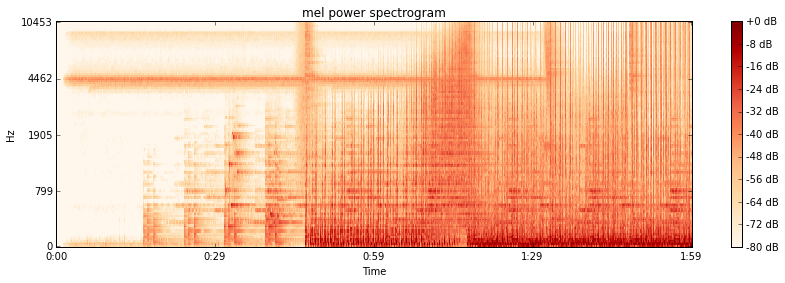

In [14]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

# Chromagram

This is a chromagram

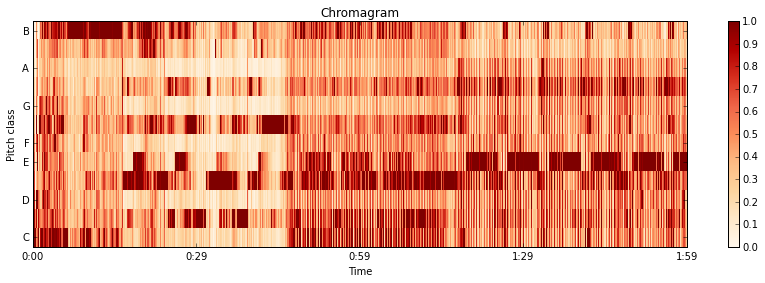

In [8]:
# We'll use a CQT-based chromagram here.  An STFT-based implementation also exists in chroma_cqt()
# We'll use the harmonic component to avoid pollution from transients
C = librosa.feature.chroma_cqt(y=y, sr=sr)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Chromagram')
plt.colorbar()

plt.tight_layout()

# Recurrence Matrix

In [9]:
R = librosa.segment.recurrence_matrix(C, sym=True)

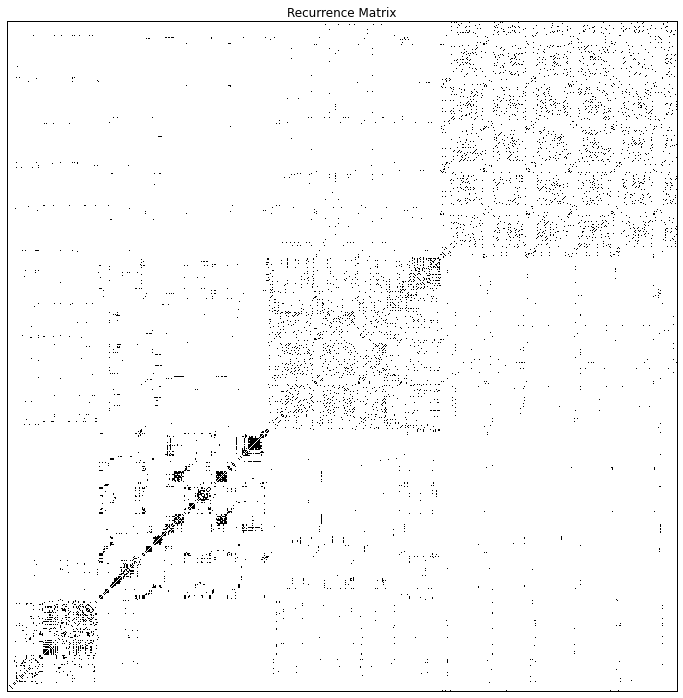

In [11]:
# Make a new figure
plt.figure(figsize=(12,12))

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(R, aspect='equal')

plt.title('Recurrence Matrix')